# Comparison of models for Like using two different limits for the parameters

## individual models

## Import components

In [16]:
import glam
import pandas as pd
import numpy as np
import os.path
import numpy
import statistics 

import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob
import os



Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
def ttestsPlot(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "More", lab2 = "Less",title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [More - Less] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(title, fontsize=25)
    sns.despine()

In [18]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel,titleVar = ''):

    f = plt.figure(figsize=(10, 10))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    
    
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 30,
        }
    plt.title(titleVar,fontdict=font)
    plt.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    
   # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
   # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    

    plt.show()


# No inversion condition in Dislike
--------------------------------------------------------------------


# Load parameters for both conditions

In [19]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
Dislike_sufix = '_Like_NoBin_Gamma01_NUTS_31'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Dislike_sufix+'.npy'))   

# Load params from LIKE hierarchical model
Like_sufix = '_Like_NoBin_NUTS_31'
glam_full_like_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Like_sufix+'.npy'))   

## Parameters Like

In [20]:
glam_full_like_estimates

array({'v_sd': 1.3e-05, 'v_mu': 5.2e-05, 'gamma_mu': -0.26, 'tau_mu': 3.34, 't0': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'b': 1.0, 'tau_sd': 1.14, 'SNR': array([151.23, 137.71, 141.48, 157.6 ,  96.58, 113.65, 163.65, 150.49,
       175.26, 137.66, 139.86, 147.06, 165.72, 191.67, 149.37, 150.47,
       152.69, 102.32, 114.35,  77.01, 160.24, 190.84, 108.44, 175.71,
       195.32, 138.12, 123.71, 182.16, 203.52, 169.7 , 185.39]), 'p_error': 0.05, 'tau': array([3.74, 4.3 , 2.59, 4.65, 4.22, 2.8 , 3.55, 3.29, 1.24, 4.77, 2.09,
       2.97, 3.83, 2.52, 2.44, 4.53, 4.87, 4.56, 3.05, 3.59, 3.02, 1.36,
       4.41, 4.98, 3.77, 2.39, 4.4 , 3.69, 2.15, 4.1 , 0.54]), 'gamma_sd': 0.38, 'gamma': array([-0.11,  0.29, -0.  , -0.1 , -0.37,  0.15, -0.  , -0.08, -0.71,
       -0.08, -0.07, -0.29, -0.1 ,  0.15,  0.42, -0.57,  0.03, -0.38,
       -0.71, -0.72, -0.38, -0.17, -0.15, -0.4 ,  0.07, -0.31, -0.7

In [21]:
params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item[0])
params_part_like

TypeError: 'builtin_function_or_method' object is not subscriptable

In [22]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

NameError: name 'params_part_like' is not defined

## Parameters Dislike

In [23]:
glam_full_dislike_estimates

array({'b': 1.0, 'p_error': 0.05, 'v_mu': 5.3e-05, 'v_sd': 1.4e-05, 'v': array([4.7e-05, 8.0e-05, 5.8e-05, 4.4e-05, 8.2e-05, 6.1e-05, 6.7e-05,
       4.5e-05, 5.6e-05, 4.6e-05, 4.6e-05, 5.1e-05, 4.6e-05, 4.4e-05,
       4.4e-05, 5.1e-05, 5.6e-05, 5.3e-05, 6.1e-05, 1.0e-04, 4.5e-05,
       3.5e-05, 7.8e-05, 4.1e-05, 3.2e-05, 5.5e-05, 5.6e-05, 5.4e-05,
       3.5e-05, 4.8e-05, 4.1e-05]), 'gamma_mu': 0.01, 'gamma_sd': 0.0, 'gamma': array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]), 'SNR_mu': 157.34, 'SNR_sd': 32.97, 'SNR': array([169.6 , 119.92, 142.87, 165.13,  94.26, 122.47, 124.48, 158.02,
       176.29, 166.76, 133.61, 145.88, 158.56, 168.25, 165.65, 166.93,
       146.17, 134.19, 104.94,  52.89, 168.31, 197.91, 105.01, 202.18,
       255.54, 142.94, 146.86, 192.07, 177.86, 158.24, 184.47]), 's': array([0.007705, 0.009673, 0.0083

In [24]:
params_part_dislike = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(0))
params_part_dislike

,b,p_error,v_mu,v_sd,v,gamma_mu,gamma_sd,gamma,SNR_mu,SNR_sd,SNR,s,tau_mu,tau_sd,tau,t0
0,1.0,0.05,0.000053,0.000014,0.000047,0.01,0.0,0.01,157.34,32.97,169.60,0.007705,2.93,1.22,3.97,0.0
1,1.0,0.05,0.000053,0.000014,0.000080,0.01,0.0,0.01,157.34,32.97,119.92,0.009673,2.93,1.22,3.51,0.0
2,1.0,0.05,0.000053,0.000014,0.000058,0.01,0.0,0.01,157.34,32.97,142.87,0.008335,2.93,1.22,2.70,0.0
3,1.0,0.05,0.000053,0.000014,0.000044,0.01,0.0,0.01,157.34,32.97,165.13,0.006929,2.93,1.22,3.89,0.0
4,1.0,0.05,0.000053,0.000014,0.000082,0.01,0.0,0.01,157.34,32.97,94.26,0.007966,2.93,1.22,2.19,0.0
5,1.0,0.05,0.000053,0.000014,0.000061,0.01,0.0,0.01,157.34,32.97,122.47,0.007680,2.93,1.22,1.72,0.0
6,1.0,0.05,0.000053,0.000014,0.000067,0.01,0.0,0.01,157.34,32.97,124.48,0.010188,2.93,1.22,2.94,0.0
7,1.0,0.05,0.000053,0.000014,0.000045,0.01,0.0,0.01,157.34,32.97,158.02,0.007720,2.93,1.22,4.37,0.0
8,1.0,0.05,0.000053,0.000014,0.000056,0.01,0.0,0.01,157.34,32.97,176.29,0.009373,2.93,1.22,0.65,0.0
9,1.0,0.05,0.000053,0.000014,0.000046,0.01,0.0,0.01,157.34,32.97,166.76,0.007681,2.93,1.22,4.92,0.0


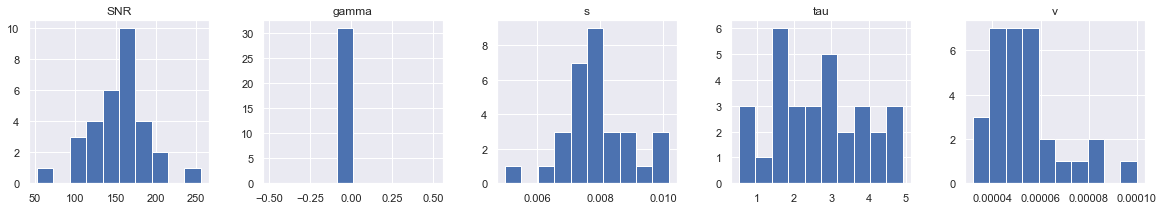

In [25]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

In [26]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

NameError: name 'params_part_like' is not defined

In [ ]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

## We used repeated measures t-test to look for differences between both conditions.

In [ ]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

In [ ]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = '$\gamma$')
plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = r'$\tau$')
plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255','Like '+ r'$\gamma$' + ' :[-1 1]',  'Like '+ r'$\gamma$'+' :[0 1]',title = '$\sigma$')
plt.ylim(0.004,0.012 )

In [ ]:
LD_Gamma =  pd.DataFrame()
LD_Gamma['Dislike'] =  params_part_dislike.gamma
LD_Gamma['Like'] =   params_part_like.gamma
correl_plot(LD_Gamma,'Like', 'Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]', r'$\gamma$')



In [ ]:
LD_Tau =  pd.DataFrame()
LD_Tau['Dislike'] =  params_part_dislike.tau
LD_Tau['Like'] =  params_part_like.tau
correl_plot(LD_Tau,'Like', 'Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]', r'$\tau$')

In [ ]:
LD_S =  pd.DataFrame()
LD_S['Dislike'] =  params_part_dislike.s
LD_S['Like'] =  params_part_like.s
correl_plot(LD_S,'Like', 'Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]', r'$\sigma$')

In [6]:
LD_V =  pd.DataFrame()
LD_V['Dislike'] =  params_part_dislike.v
LD_V['Like'] =  params_part_like.v
correl_plot(LD_V,'Like','Like '+ r'$\gamma$' + ' :[-1 1]','Dislike','Like '+ r'$\gamma$'+' :[0 1]',r'$\nu$')

NameError: name 'params_part_dislike' is not defined

In [ ]:
params_like_01 = params_part_dislike

# The same but for Dislike
--------------------------------------------------------

# Load parameters for both conditions

In [17]:
# Load params from DISLIKE hierarchical model (using inverted input [3-value])
Like_sufix = '_Dislike_NoBin_Dislike_NUTS_Inv_31'
glam_full_dislike_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Dislike_sufix+'.npy'))   

# Load params from LIKE hierarchical model
Dislike_sufix = '_Dislike_NoBin_Dislike_Gamma01_NUTS_Inv_31'
glam_full_like_estimates = np.load(str('results/estimates/glam_FF2018_full_hierarchical_cv'+Like_sufix+'.npy'))   

## Parameters Like

In [18]:
params_part_like = pd.DataFrame.from_dict(glam_full_like_estimates.item(0))
params_part_like

,gamma_mu,gamma,p_error,gamma_sd,tau_sd,v_mu,b,SNR_sd,v_sd,tau_mu,tau,t0,v,s,SNR_mu,SNR
0,-0.09,0.53,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,3.45,0.0,0.000039,0.005929,186.55,175.47
1,-0.09,0.73,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,2.18,0.0,0.000050,0.010297,186.55,200.96
2,-0.09,0.97,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,0.93,0.0,0.000042,0.007670,186.55,159.54
3,-0.09,-0.05,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,2.92,0.0,0.000037,0.007801,186.55,178.00
4,-0.09,0.18,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,4.10,0.0,0.000050,0.009849,186.55,186.73
5,-0.09,0.27,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,3.45,0.0,0.000047,0.008528,186.55,173.28
6,-0.09,0.21,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,1.81,0.0,0.000055,0.009641,186.55,145.49
7,-0.09,-0.09,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,3.79,0.0,0.000042,0.007573,186.55,159.34
8,-0.09,-0.67,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,3.15,0.0,0.000047,0.008367,186.55,160.79
9,-0.09,-0.67,0.05,0.48,1.01,0.000044,1.0,35.83,0.000011,2.85,4.68,0.0,0.000052,0.007714,186.55,124.54


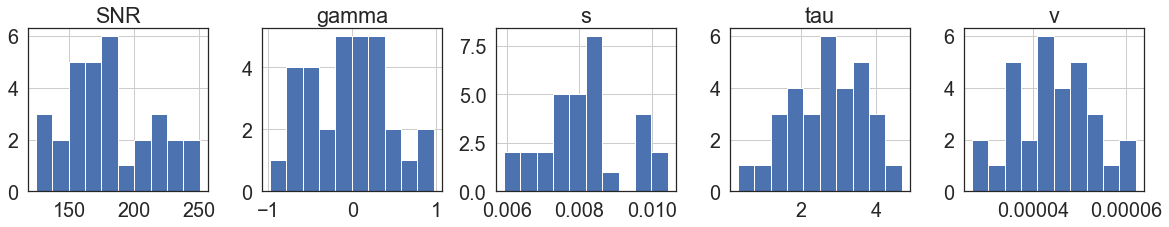

In [19]:
hist = params_part_like[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

## Parameters Dislike

In [20]:
params_part_dislike = pd.DataFrame.from_dict(glam_full_dislike_estimates.item(0))
params_part_dislike

,b,p_error,v_mu,v_sd,v,gamma_mu,gamma_sd,gamma,SNR_mu,SNR_sd,SNR,s,tau_mu,tau_sd,tau,t0
0,1.0,0.05,0.000053,0.000014,0.000047,0.01,0.0,0.01,157.34,32.97,169.60,0.007705,2.93,1.22,3.97,0.0
1,1.0,0.05,0.000053,0.000014,0.000080,0.01,0.0,0.01,157.34,32.97,119.92,0.009673,2.93,1.22,3.51,0.0
2,1.0,0.05,0.000053,0.000014,0.000058,0.01,0.0,0.01,157.34,32.97,142.87,0.008335,2.93,1.22,2.70,0.0
3,1.0,0.05,0.000053,0.000014,0.000044,0.01,0.0,0.01,157.34,32.97,165.13,0.006929,2.93,1.22,3.89,0.0
4,1.0,0.05,0.000053,0.000014,0.000082,0.01,0.0,0.01,157.34,32.97,94.26,0.007966,2.93,1.22,2.19,0.0
5,1.0,0.05,0.000053,0.000014,0.000061,0.01,0.0,0.01,157.34,32.97,122.47,0.007680,2.93,1.22,1.72,0.0
6,1.0,0.05,0.000053,0.000014,0.000067,0.01,0.0,0.01,157.34,32.97,124.48,0.010188,2.93,1.22,2.94,0.0
7,1.0,0.05,0.000053,0.000014,0.000045,0.01,0.0,0.01,157.34,32.97,158.02,0.007720,2.93,1.22,4.37,0.0
8,1.0,0.05,0.000053,0.000014,0.000056,0.01,0.0,0.01,157.34,32.97,176.29,0.009373,2.93,1.22,0.65,0.0
9,1.0,0.05,0.000053,0.000014,0.000046,0.01,0.0,0.01,157.34,32.97,166.76,0.007681,2.93,1.22,4.92,0.0


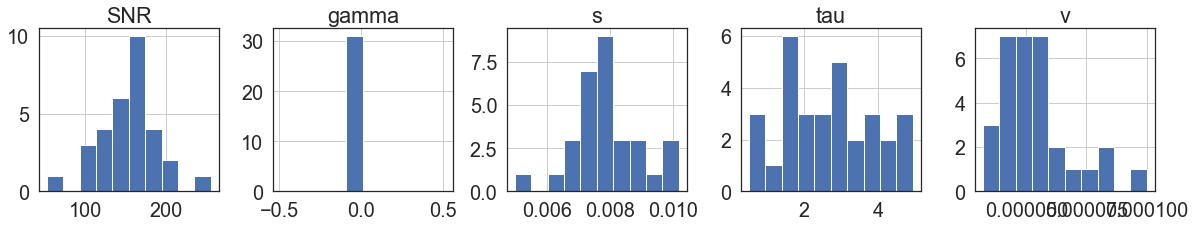

In [21]:
hist = params_part_dislike[['SNR','gamma','tau','v','s']].hist(figsize = [20,3] , layout=[1,5])

In [22]:
# getting max, min and median values for our parameters from participants results
median_SNR_l = params_part_like[['SNR']].median().iloc[0]
median_gamma_l = params_part_like[['gamma']].median().iloc[0]
median_tau_l = params_part_like[['tau']].median().iloc[0]
median_v_l = params_part_like[['v']].median().iloc[0]
median_s_l = params_part_like[['s']].median().iloc[0]

medians_l = [ median_SNR_l , median_gamma_l, median_tau_l ,median_v_l ,median_s_l ]

max_SNR_l = params_part_like[['SNR']].max().iloc[0]
max_gamma_l = params_part_like[['gamma']].max().iloc[0]
max_tau_l = params_part_like[['tau']].max().iloc[0]
max_v_l = params_part_like[['v']].max().iloc[0]
max_s_l = params_part_like[['s']].max().iloc[0]

maxims_l = [ max_SNR_l , max_gamma_l, max_tau_l ,max_v_l ,max_s_l ]

min_SNR_l = params_part_like[['SNR']].min().iloc[0]
min_gamma_l = params_part_like[['gamma']].min().iloc[0]
min_tau_l = params_part_like[['tau']].min().iloc[0]
min_v_l = params_part_like[['v']].min().iloc[0]
min_s_l = params_part_like[['s']].min().iloc[0]

minis_l = [min_SNR_l , min_gamma_l, min_tau_l ,min_v_l ,min_s_l]

params_label = ['SNR','gamma','tau','v','s']

summary_l=[]
summary_l = np.column_stack((params_label, medians_l, maxims_l, minis_l))
summary_l = pd.DataFrame(summary_l, columns = ['params','med','maxims' ,'mins'])

In [23]:
## Merge dislike and like conditions in one dataframe

params_part_dislike['cond'] = 'Dislike'
params_part_like['cond'] = 'Like'
params_part_dislike['part'] = range(len(params_part_dislike))
params_part_like['part'] = range(len(params_part_dislike))
params_participants = [params_part_like , params_part_dislike]
params_participants = pd.concat(params_participants)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


## We used repeated measures t-test to look for differences between both conditions.

In [24]:
diff = mean(params_part_like.SNR) - mean(params_part_dislike.SNR)
[s, p] = stats.ttest_rel(params_part_like.SNR,params_part_dislike.SNR)
print ("SNR: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.gamma) - mean(params_part_dislike.gamma)
[s, p] = stats.ttest_rel(params_part_like.gamma,params_part_dislike.gamma)
print ("Gamma: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.tau) - mean(params_part_dislike.tau)
[s, p] = stats.ttest_rel(params_part_like.tau,params_part_dislike.tau)
print ("Tau: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

diff = mean(params_part_like.v) - mean(params_part_dislike.v)
[s, p] = stats.ttest_rel(params_part_like.v,params_part_dislike.v)
print ("V: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )
print ("V: Like : " + str(mean(params_part_like.v)) + " ; Dislike =" + str(mean(params_part_dislike.v)) )

diff = mean(params_part_like.s) - mean(params_part_dislike.s)
[s, p] = stats.ttest_rel(params_part_like.s,params_part_dislike.s)
print ("S: [Like - Dislike] =  " + str(diff) + " ; p-value =" + str(p) )

SNR: [Like - Dislike] =  27.606774193548432 ; p-value =0.0014125934472279246
Gamma: [Like - Dislike] =  -0.046129032258064494 ; p-value =0.6002588853378608
Tau: [Like - Dislike] =  0.03419354838709765 ; p-value =0.8878310843064126
V: [Like - Dislike] =  -9.193548387096799e-06 ; p-value =0.0002131902031755328
V: Like : 4.429032258064515e-05 ; Dislike =5.348387096774195e-05
S: [Like - Dislike] =  0.00023399999999999983 ; p-value =0.2453058095877389


In [25]:
def add_star(list1,list2):
    x1, x2 = 1, 2   
    y_max = max([list1.max(),list2.max()])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


MeanL = -0.04; MeanD = 0.01; [Like - Dislike] =  -0.05; t =  -0.53 ; p-value =0.6
MeanL = 2.73; MeanD = 2.69; [Like - Dislike] =  0.03; t =  0.14 ; p-value =0.89
MeanL = 0.0; MeanD = 0.0; [Like - Dislike] =  -0.0; t =  -4.21 ; p-value =0.0
MeanL = 0.01; MeanD = 0.01; [Like - Dislike] =  0.0; t =  1.19 ; p-value =0.25


(0.004, 0.012)

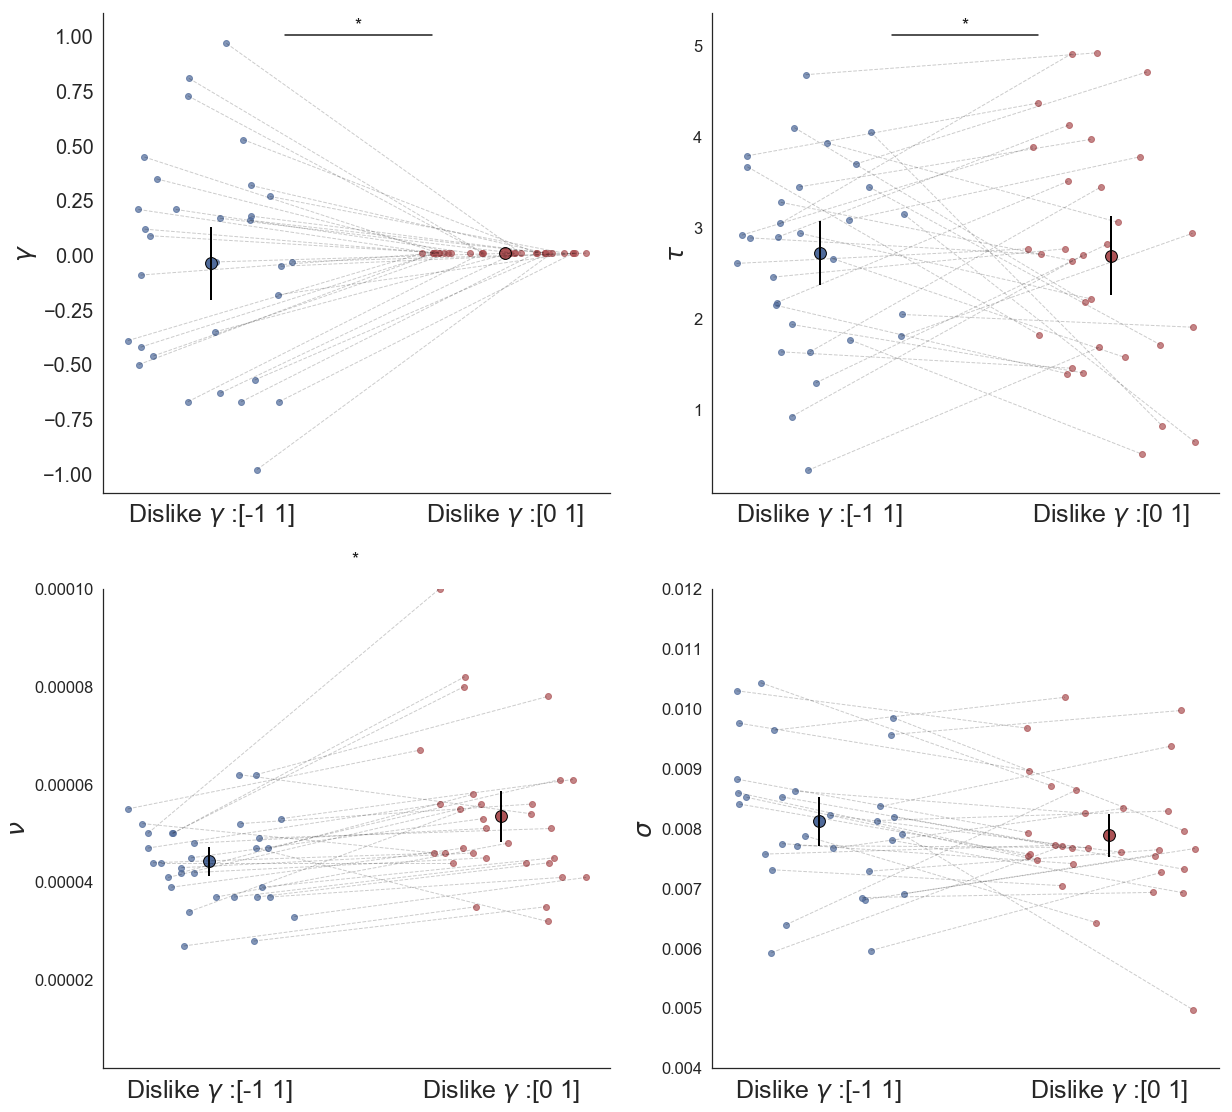

In [26]:
f = plt.figure(figsize=(20,30))
sns.set(style='white', font_scale=1.8)

plt.subplot(321)
ttestsPlot(params_part_like.gamma, params_part_dislike.gamma,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]',  'Dislike '+ r'$\gamma$' + ' :[0 1]',title = '$\gamma$')
add_star(params_part_like.gamma,params_part_dislike.gamma)

plt.subplot(322)
ttestsPlot(params_part_like.tau, params_part_dislike.tau,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]', 'Dislike '+ r'$\gamma$' + ' :[0 1]',title = r'$\tau$')
add_star(params_part_like.tau,params_part_dislike.tau)

plt.subplot(323)
ttestsPlot(params_part_like.v, params_part_dislike.v,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]', 'Dislike '+ r'$\gamma$' + ' :[0 1]',title = r'$\nu$')
plt.ylim(0.000002, 0.0001)
add_star(params_part_like.v,params_part_dislike.v)

plt.subplot(324)
ttestsPlot(params_part_like.s, params_part_dislike.s,'#4F6A9A','#AC5255','Dislike '+ r'$\gamma$' + ' :[-1 1]',  'Dislike '+ r'$\gamma$' + ' :[0 1]',title = '$\sigma$')
plt.ylim(0.004,0.012 )

Pearson's r = 0.0 p =  1.0


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.01, top=0.01
  ret = ax.set_ylim(*args, **kwargs)


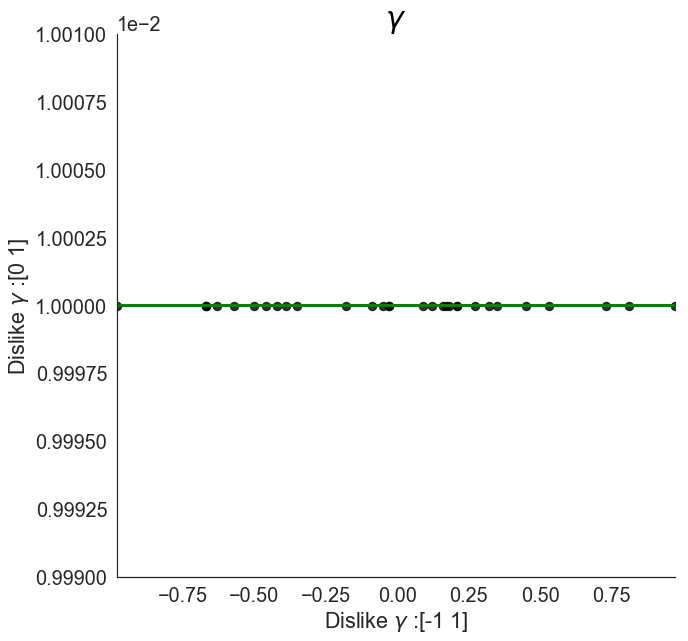

In [27]:
LD_Gamma =  pd.DataFrame()
LD_Gamma['Dislike'] =  params_part_dislike.gamma
LD_Gamma['Like'] =  params_part_like.gamma
correl_plot(LD_Gamma,'Like', 'Dislike '+ r'$\gamma$' + ' :[-1 1]','Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\gamma$')

Pearson's r = 0.313 p =  0.087


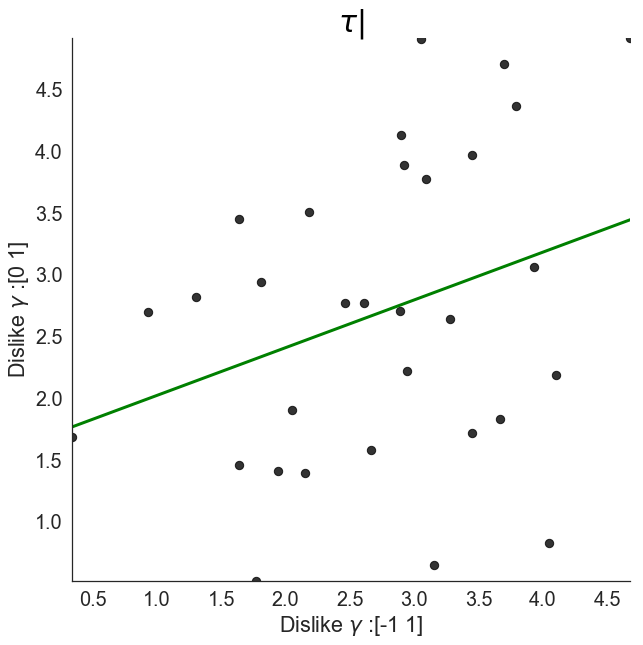

In [28]:
LD_Tau =  pd.DataFrame()
LD_Tau['Dislike'] =  params_part_dislike.tau
LD_Tau['Like'] =  params_part_like.tau
correl_plot(LD_Tau,'Like','Dislike '+ r'$\gamma$' + ' :[-1 1]','Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\tau|$')

Pearson's r = 0.513 p =  0.003


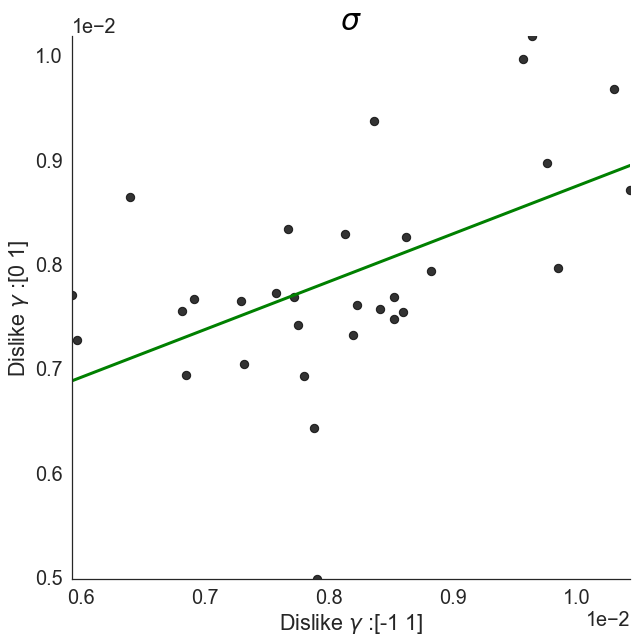

In [29]:
LD_S =  pd.DataFrame()
LD_S['Dislike'] =  params_part_dislike.s
LD_S['Like'] =  params_part_like.s
correl_plot(LD_S,'Like', 'Dislike '+ r'$\gamma$' + ' :[-1 1]','Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\sigma$')

Pearson's r = 0.585 p =  0.001


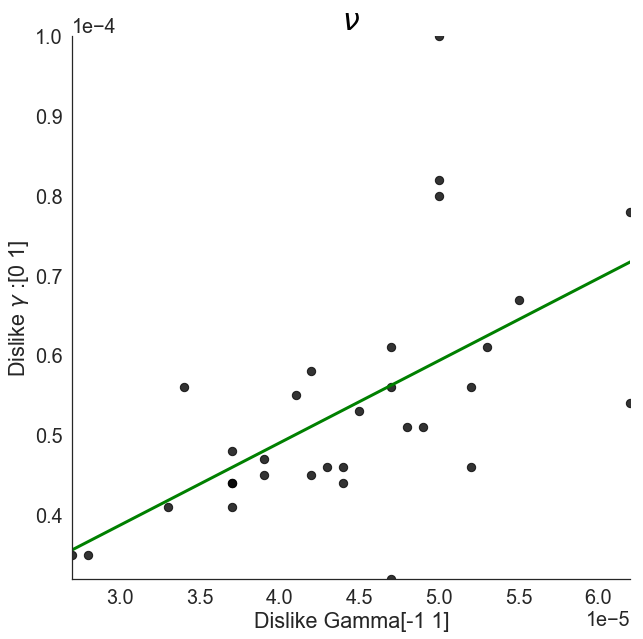

In [30]:
LD_V =  pd.DataFrame()
LD_V['Dislike'] =  params_part_dislike.v
LD_V['Like'] =  params_part_like.v
correl_plot(LD_V,'Like', "Dislike Gamma[-1 1]",'Dislike','Dislike '+ r'$\gamma$' + ' :[0 1]',r'$\nu$')

In [ ]:
params_dislike_01 = params_part_dislike

## Violin plot for the comparison of the parameters

In [8]:
# Add asterisk
def add_star1(data1, data2,p):
    if p<0.05:
        if p < 0.001:
            star_num = '***' #3
        elif p< 0.01:
            star_num = '**' #2
        elif p< 0.05:
            star_num = '*' #1
        else:
            star_num = 0
        
        x1, x2 = 1, 2   
        y_max = max([np.max(data1), np.max(data2)])
        y, h, col = y_max + y_max/50, y_max/50, 'k'
        plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
        plt.text((x1+x2)*.5, y+h, star_num, ha='center', va='bottom', color=col, fontsize = 30)

In [9]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
  #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [ ]:
params_part_like = params_like_01
params_part_dislike = params_dislike_01

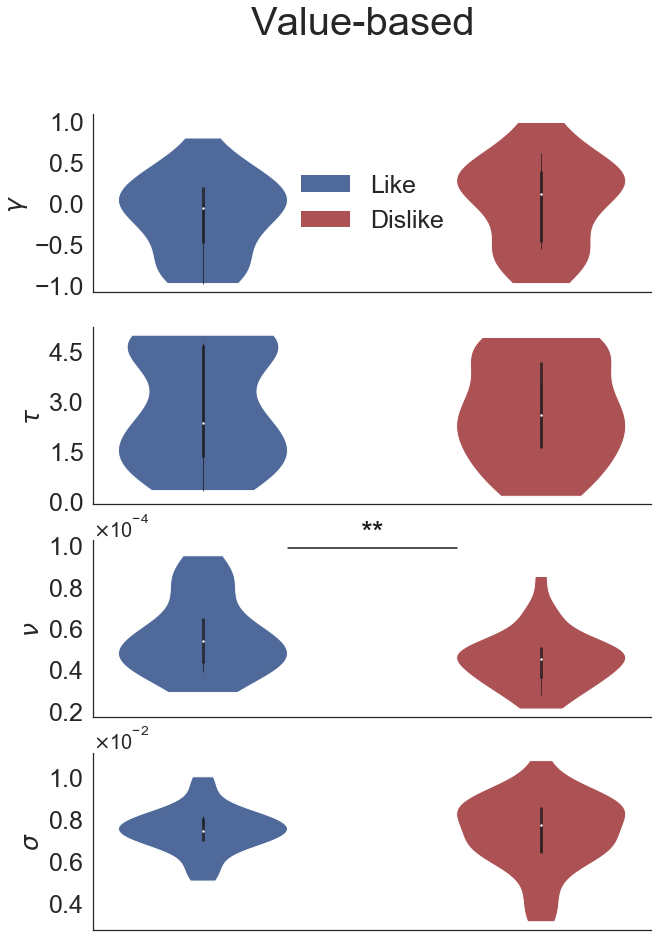

In [13]:
ysize = 25
ticksize = 25
nticks = 5

f= plt.figure(figsize=(10,15))
sns.set(style='white', font_scale=1.8)

colr_dict = { 0:'#4F6A9A', 1:'#AC5255' }

ax = plt.subplot(411)

## ** Since SNR is a function of gamma we plot gamma as the free parameter 

# FOR gamma
#plt.subplot(321)
all_arr1 = [params_part_like.gamma.values,
            params_part_dislike.gamma.values]
add_violin(all_arr1)

add_star1(all_arr1[0], all_arr1[1],p_gamma)
#plt.xticks([1 ,2], ['Most', 'Few'])
plt.ylabel(r'$\gamma$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))


# PLot legend
patch1 = mpatches.Patch(facecolor=colr_dict[0],hatch=r'', label='Like')
patch2 = mpatches.Patch(facecolor=colr_dict[1],hatch=r'', label='Dislike')

leg = plt.legend(handles=[patch1,patch2],fontsize=25,loc = "center")
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)


# FOR tau
ax = plt.subplot(412)
all_arr1 = [params_part_like.tau.values,
            params_part_dislike.tau.values]

add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1],p_tau)
plt.ylabel(r'$\tau$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))



# FOR v
ax = plt.subplot(413)
all_arr1 = [params_part_like.v.values,
            params_part_dislike.v.values]
add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1],p_v)
plt.ylabel(r'$\nu$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False)
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

# FOR s
ax = plt.subplot(414)
all_arr1 = [params_part_like.s.values,
            params_part_dislike.s.values]
add_violin(all_arr1)
add_star1(all_arr1[0], all_arr1[1],p_s)
plt.ylabel(r'$\sigma$', size = ysize)
plt.yticks(fontsize=ticksize)
plt.tick_params( axis='x', which='both',bottom=False,top=False,labelbottom=False) 
ax.yaxis.set_major_locator(plt.MaxNLocator(nticks))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

plt.suptitle('Value-based', size = 40)


sns.despine()

## **Except for Gamma the other parameters matain their order across participants**